In [65]:
import seaborn as sns
sns.set_theme(context="notebook", font_scale=2,
              rc={"figure.constrained_layout.use": True,
                  "figure.figsize": [10, 6]})

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [66]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1) 
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

X_unscaled = X.copy()
X_unscaled[:, 1] *= 1000

[Text(0.5, 1.0, 'KNN with scaling')]

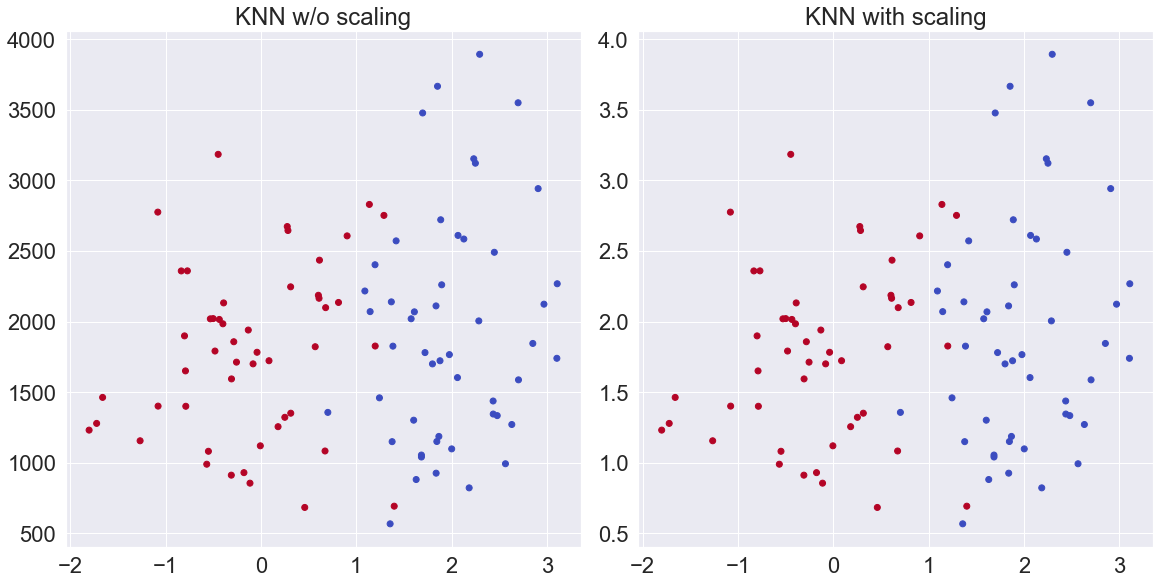

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.scatter(X_unscaled[:, 0], X_unscaled[:, 1], c=y, cmap='coolwarm')
ax2.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
ax1.set(title="KNN w/o scaling")
ax2.set(title="KNN with scaling")
# fig.savefig("images/knn-data.svg")

In [68]:
knc = KNeighborsClassifier().fit(X, y)
knc_unscaled = KNeighborsClassifier().fit(X_unscaled, y)

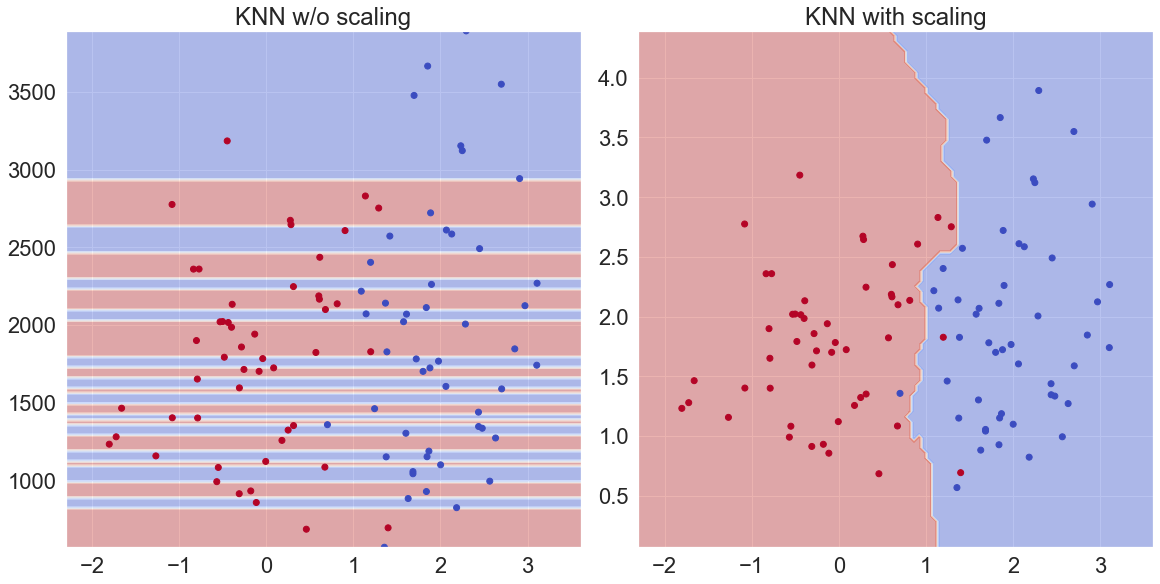

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.set(title="KNN w/o scaling")
ax2.set(title="KNN with scaling")
data_pairs = [(knc_unscaled, X_unscaled, ax1), (knc, X, ax2)]
h = 100
for est, cur_X, ax in data_pairs:
    x_min, x_max = cur_X[:, 0].min() - .5, cur_X[:, 0].max() + .5
    y_min, y_max = cur_X[:, 1].min() - .5, cur_X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h),
                         np.linspace(y_min, y_max, h))
    Z = est.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.4)
    ax.scatter(cur_X[:, 0], cur_X[:, 1], c=y, cmap='coolwarm')
# fig.savefig("images/knn-scaling.svg")